Pymaceuticals Inc.
---
- Analysis

*Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.*

**Observation 1:** The correlation between mouse weight and the average tumor volume is 0.84. This indicates a fairly strong positive correlation. When mouse weight increases, so does tumor volume. 

**Observation 2:** Looking at the boxplots, Capomulin and Ramicane look to have had the best results relating to final tumor volume. 

**Observation 3:** Looking at the specific case of Mouse ID l509 and it's Capomulin regimen, we can see tumor volume has an overall decline over the 40+ days. Further supporting the analysis in obervation 2 which infers good resaults when undergoing the Capomulin regimen. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge (study_results, mouse_metadata, how='left', on='Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = combined_data.loc[combined_data['Mouse ID'] == 'g989', :]
duplicate_info


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data.query('`Mouse ID` not in @duplicate_mice_ID')
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#first create a series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
total_rows = cleaned_df["Drug Regimen"].value_counts()
total_rows

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

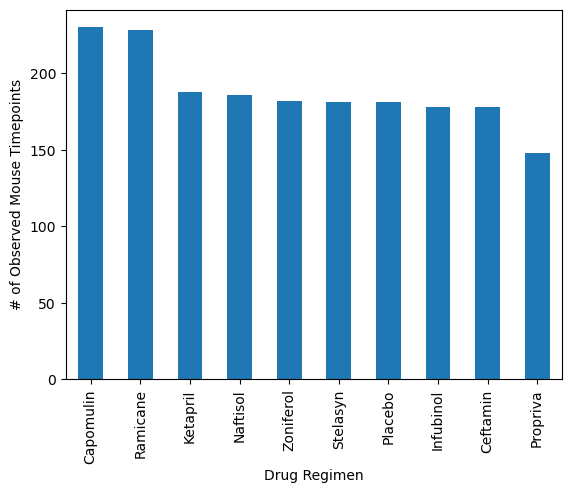

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_total_rows = total_rows.plot.bar()

# Set xlabel, ylabel, and title 
plot_total_rows.set_xlabel("Drug Regimen")
plot_total_rows.set_ylabel("# of Observed Mouse Timepoints")

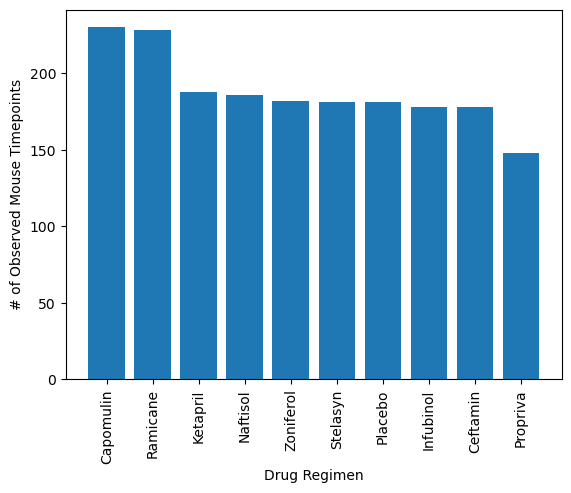

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(total_rows.index, total_rows.values)

# Set x-axis label, y-axis label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate x-axis tick labels vertically
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


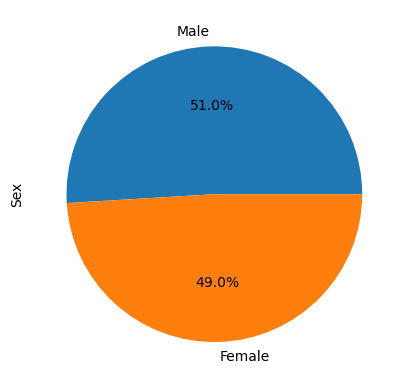

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#first create a new series using the 'Sex' column 
gender_split = cleaned_df["Sex"].value_counts()

#generate pie plot using new 'gender' series
gender_split.plot.pie(autopct='%.1f%%')
plt.show()

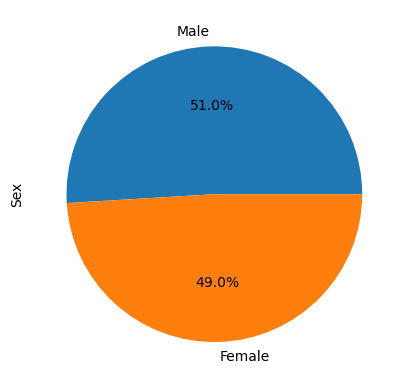

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_split, labels=gender_split.index, autopct='%.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a list of the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last_timepoint DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the merged DataFrame to include only the four treatment regimens
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]

# Display the resulting DataFrame
filtered_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and determine potential outliers for each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = filtered_df.loc[filtered_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calculate the IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Check for potential outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_quartile - (1.5 * iqr)) | (tumor_vol > upper_quartile + (1.5 * iqr))]
    
    print(f"{treatment}'s potential outliers", outliers)


Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


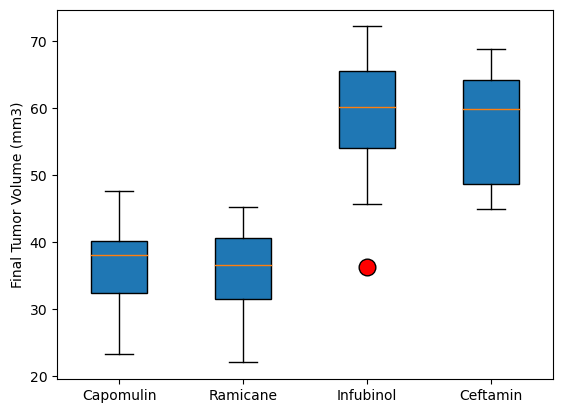

In [16]:
# Create a list of tumor volume data for each treatment group
tumor_vol_data = [filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'],
                  filtered_df.loc[filtered_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'],
                  filtered_df.loc[filtered_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)'],
                  filtered_df.loc[filtered_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']]

# Create a figure and axes
fig, ax = plt.subplots()

# Generate the box plot with customized outliers
boxplot = ax.boxplot(tumor_vol_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], patch_artist=True)

# Set the y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

# Set the size and color of the outliers
outlier_marker = dict(markerfacecolor='red', marker='o', markersize=12)

for flier in boxplot['fliers']:
    flier.set(**outlier_marker)
 
# Show the plot
plt.show()



## Line and Scatter Plots

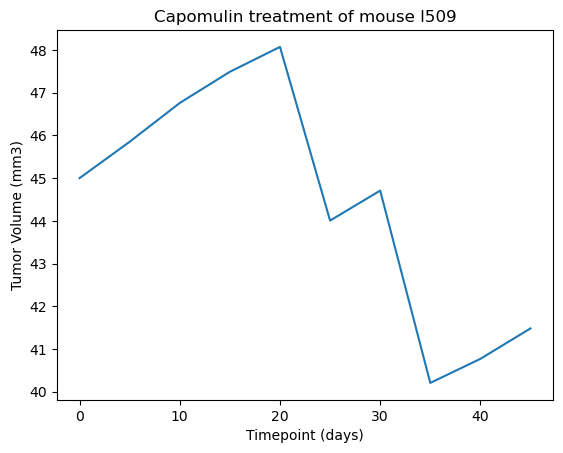

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#create new DF with sorted values required
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

capomulin_l509_df = capomulin_df[capomulin_df['Mouse ID'] == 'l509'].sort_values('Mouse ID')

# Generate the line plot
mouse_id = 'l509'

plt.plot(capomulin_l509_df['Timepoint'], capomulin_l509_df['Tumor Volume (mm3)'])

# Set the plot title and labels
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()





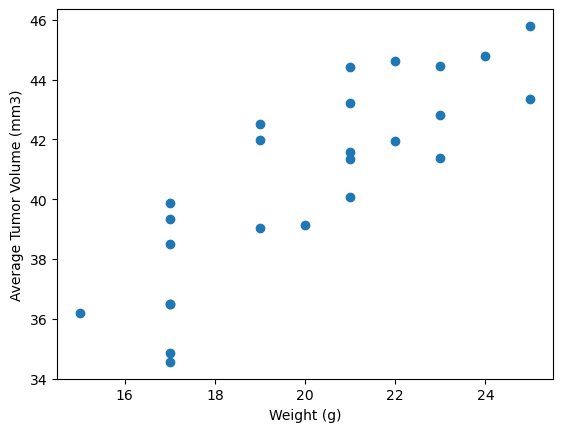

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse ID
avg_capm_vol = capomulin_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Create a new figure and axes for the plot
fig1, ax1 = plt.subplots()

# Set the marker size for the scatter plot
marker_size = 15

# Generate scatter plot using the average weight as the x-axis and average tumor volume as the y-axis
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])

# Set x-axis label, and y-axis label for the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()



## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient for mouse weight and average tumor volume for Capomulin regimen 

print("The correlation between mouse weight and the average tumor volume is", 
      round(st.pearsonr(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])[0], 2))


The correlation between mouse weight and the average tumor volume is 0.84


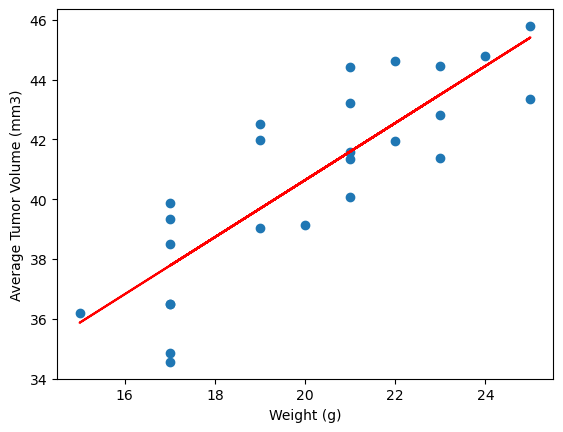

In [20]:
# Calculate linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])

# Create scatter plot
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])

# Add linear regression line
x = avg_capm_vol['Weight (g)']
y = slope * x + intercept
plt.plot(x, y, color='red')

# Set labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display plot
plt.show()
